In [10]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
# result = reader.readtext('chinese.')

In [11]:

FONT_PATH = r'C:/Windows/Fonts/arial.ttf'

img_path = '../assets/else/sunset-lake-landscape-illustration-free-vector.jpg'
img_path = '../assets/else/arrows.png'
img_path = '../assets/internet/petri_net_5.png'
img_path = '../assets/local/complex_petri_1.jpg'
img_path = '../assets/local/complex_petri_2_temp.png'
# img_path = '../assets/local/mid_petri_1_temp.png'
# img_path = '../assets/local/simple_petri_1.jpg'
# img_path = '../assets/else/dogs.jpeg'
# img_path = '../assets/else/overlapped.png'
# img_path = '../assets/else/padded_image.png'

# img_path = '../assets/postprocessed/superres.jpg'


In [12]:
result = reader.readtext(img_path, text_threshold=0.01)
result

[([[np.int32(66), np.int32(8)],
   [np.int32(142), np.int32(8)],
   [np.int32(142), np.int32(16)],
   [np.int32(66), np.int32(16)]],
  '{nmon_bol ncomea',
  np.float64(0.1018572848296172)),
 ([[np.int32(436), np.int32(10)],
   [np.int32(466), np.int32(10)],
   [np.int32(466), np.int32(14)],
   [np.int32(436), np.int32(14)]],
  'Fetnan]',
  np.float64(0.0008910713738160737)),
 ([[np.int32(466), np.int32(8)],
   [np.int32(516), np.int32(8)],
   [np.int32(516), np.int32(14)],
   [np.int32(466), np.int32(14)]],
  'CEennbl',
  np.float64(0.001126675747342386)),
 ([[np.int32(150), np.int32(14)],
   [np.int32(200), np.int32(14)],
   [np.int32(200), np.int32(20)],
   [np.int32(150), np.int32(20)]],
  'rhnteAloed',
  np.float64(0.008358060921659265)),
 ([[np.int32(648), np.int32(16)],
   [np.int32(696), np.int32(16)],
   [np.int32(696), np.int32(22)],
   [np.int32(648), np.int32(22)]],
  'TanteAaned',
  np.float64(0.07559549679071846)),
 ([[np.int32(822), np.int32(20)],
   [np.int32(908), np.in

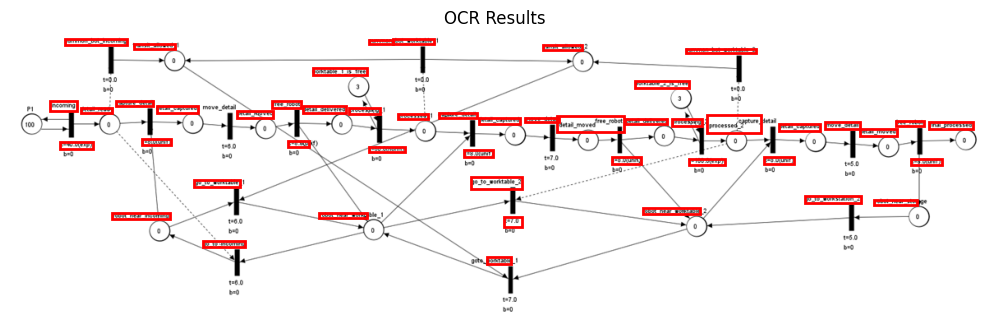

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Load the image
image = cv2.imread(img_path)
# Convert from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display image
ax.imshow(image)

# Draw bounding boxes and add text labels
for detection in result:
    # Get coordinates
    points = detection[0]
    text = detection[1]
    confidence = detection[2]
    
    # Convert points to rectangle format (x, y, width, height)
    x_min = min(point[0] for point in points)
    y_min = min(point[1] for point in points)
    width = max(point[0] for point in points) - x_min
    height = max(point[1] for point in points) - y_min
    
    # Create rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, 
                             linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # # Add text label with confidence score
    # ax.text(x_min, y_min-5, f"{text} ({confidence:.2f})", 
    #         color='red', fontsize=12, fontweight='bold')

plt.title("OCR Results")
plt.axis('off')
plt.tight_layout()
plt.show()